# Simple descriptive statistics

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the free [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/). 

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

This notebook contains an introduction to use of Python and the NumPy library for simple descriptive statistics.

In [1]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats=['svg']

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We will start by examining some data on fatigue life of strips of aluminium sheeting. The data is expressed in thousands of cycles until rupture. From the article Birnbaum, Z. W. and Saunders, S. C. (1958), *A statistical model for life-length of materials*, Journal of the American Statistical Association, 53(281). 

In [2]:
cycles = numpy.array([370, 1016, 1235, 1419, 1567, 1820, 706, 1018, 1238, 1420,
                          1578, 1868, 716, 1020, 1252, 1420, 1594, 1881, 746,
                          1055, 1258, 1450, 1602, 1890, 785, 1085, 1262, 1452,
                          1604, 1893, 797, 1102, 1269, 1475, 1608, 1895, 844,
                          1102, 1270, 1478, 1630, 1910, 855, 1108, 1290, 1481,
                          1642, 1923, 858, 1115, 1293, 1485, 1674, 1940, 886,
                          1120, 1300, 1502, 1730, 1945, 886, 1134, 1310, 1505,
                          1750, 2023, 930, 1140, 1313, 1513, 1750, 2100, 960,
                          1199, 1315, 1522, 1763, 2130, 988, 1200, 1330, 1522,
                          1768, 2215, 990, 1200, 1355, 1530, 1781, 2268, 1000,
                          1203, 1390, 1540, 1782, 2440, 1010, 1222, 1416, 1560,
                          1792])

In [3]:
cycles.mean()

1400.9108910891089

In [4]:
numpy.median(cycles)

1416.0

In [5]:
numpy.std(cycles)

389.3820211517677

In [6]:
numpy.var(cycles)

151618.35839623565

Let’s generate a few different plots to examine the distribution of the data.

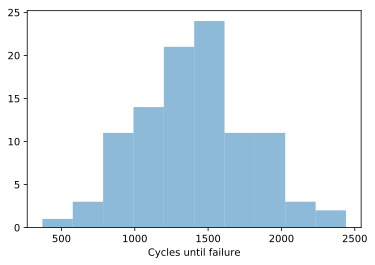

In [7]:
# start with a histogram
plt.hist(cycles, alpha=0.5)
plt.xlabel("Cycles until failure");

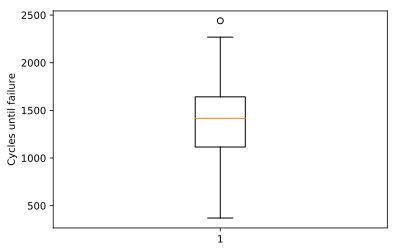

In [8]:
# now a box and whisker plot. Note that there is an outlier point (the circle)
plt.boxplot(cycles)
plt.ylabel("Cycles until failure");

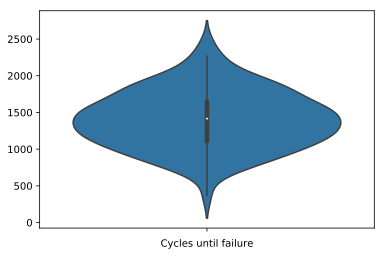

In [9]:
sns.violinplot(cycles, orient='v')
plt.xlabel("Cycles until failure");

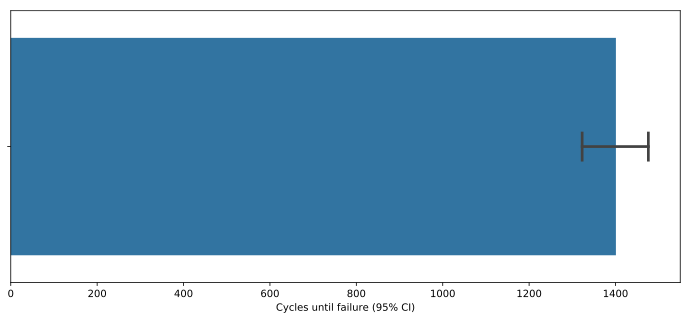

In [10]:
# a barplot with confidence interval "error bars"
plt.figure(figsize=(12,5))    
sns.barplot(cycles, ci=95, capsize=0.1)
plt.xlabel("Cycles until failure (95% CI)");

## Exploring insecticide data

Let’s explore data collected by Beall in the 1940s concerning the effect of different insecticides on insects. The dataset gives the count of insects in agricultural experimental units treated with different insecticides.

Data comes from the article Beall, G., (1942), *The Transformation of data from entomological field experiments*, Biometrika, 29, 243–262. It’s available via the `statsmodels` package.

In [11]:
import statsmodels.api as sm
insect = sm.datasets.get_rdataset('InsectSprays').data
insect.head()

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


In [12]:
# total number of observations
len(insect)

72

In [13]:
# how many observations for each spray? groupby is a function provided by the pandas library.
insect.groupby('spray').count()

,count
spray,
A,12
B,12
C,12
D,12
E,12
F,12


We want to analyze the relative effectiveness of the different insecticide sprays tested. A first level of analysis is to compare their means.

In [14]:
# relative effectiveness of each spray
insect.groupby('spray').mean()

,count
spray,
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


However, relying only on the mean can provide us with a misleading impression of the relative effectiveness; we also want to know the variability for each spray. A violinplot is a good way of showing the distribution of each insecticide effectiveness, on a single plot.

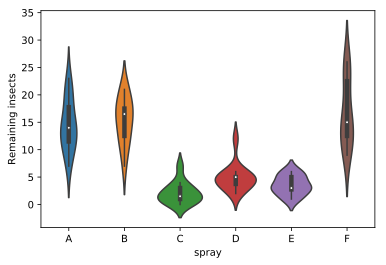

In [15]:
sns.violinplot(data=insect, x="spray", y="count")
plt.ylabel("Remaining insects");

Assuming that we really want to kill all insects (indiscriminitely), spray C seems to be the option tested with the highest effectiveness.

## Exploring material strength data

We will now examine a third dataset, material strength [data collected by Vangel](https://www.itl.nist.gov/div898/software/dataplot/data/VANGEL5.DAT) from US NIST. 

In [16]:
vangel = pandas.read_csv("https://www.itl.nist.gov/div898/software/dataplot/data/VANGEL5.DAT", header=None, squeeze=True, skiprows=25)
vangel.head()

0    25.722681
1    24.319706
2    31.007387
3    25.240414
4    35.406261
Name: 0, dtype: float64

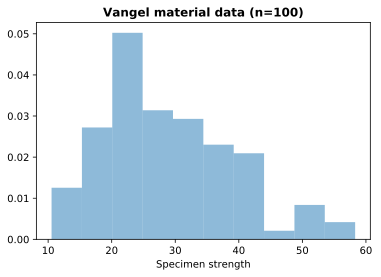

In [17]:
plt.hist(vangel, density=True, alpha=0.5)
plt.title("Vangel material data (n={})".format(len(vangel)), weight='bold')
plt.xlabel("Specimen strength");

Let's try to fit a Weibull distribution to this data.

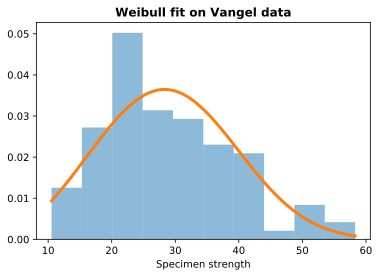

In [18]:
plt.hist(vangel, density=True, alpha=0.5)
shape, loc, scale = scipy.stats.weibull_min.fit(vangel, floc=0)
support = numpy.linspace(vangel.min(), vangel.max(), 100)
plt.plot(support, scipy.stats.weibull_min(shape, loc, scale).pdf(support), lw=3)
plt.title("Weibull fit on Vangel data", weight='bold')
plt.xlabel("Specimen strength");

Sometimes it’s clearer to plot the cumulative failure-intensity function (the empirical CDF of our dataset).

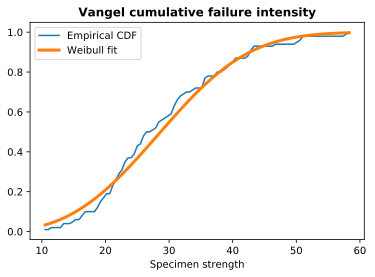

In [19]:
import statsmodels.distributions

ecdf = statsmodels.distributions.ECDF(vangel)
plt.plot(support, ecdf(support), label="Empirical CDF")
plt.plot(support, scipy.stats.weibull_min(shape,loc,scale).cdf(support), lw=3, label="Weibull fit")
plt.title("Vangel cumulative failure intensity", weight='bold')
plt.xlabel("Specimen strength")
plt.legend();

A good way of **assessing goodness of fit**, in particular in the distribution tails, is to generate a quantile-quantile plot (or probability plot).

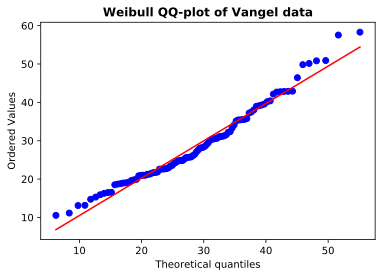

In [20]:
scipy.stats.probplot(vangel, \
                     dist=scipy.stats.weibull_min(shape,loc,scale),\
                     plot=plt.figure().add_subplot(111))
plt.title("Weibull QQ-plot of Vangel data", weight='bold');

This data follows a Weibull distribution quite well.

If we wish to estimate a particular quantile measure for this data, we can do that on the fitted distribution.

In [21]:
# the first percentile
scipy.stats.weibull_min(shape,loc,scale).ppf(0.01)

7.039123866878374